# Notebook auxiliar

En este cuadernillo auxiliar se encuentra el código desarrollado para obtener algunas de las figuras usadas en el TFG. Para su correcto funcionamiento, es necesario rellenar la variable *token* con su token de e-sios.

In [ ]:
import requests
import datetime
import pandas as pd
import hvplot.pandas
import numpy as np

token = 'INTRODUZCA AQUI SU TOKEN'
id_demanda_real = 1293

def realizaPeticion(indicador, fecha_inicio, fecha_fin, token):
    url = 'https://api.esios.ree.es/indicators/%s?start_date=%sT08:00:00Z&end_date=%sT07:00:00Z' % (indicador, fecha_inicio, fecha_fin)
    headers = {
        'Accept': 'application/json; application/vnd.esios-api-v1+json',
        'Content-Type': 'application/json',
        'x-api-key': token,
    }
    resp = requests.get(url, headers=headers)
    return resp.json()

In [2]:
init_aux = datetime.datetime(2023, 1, 1)
end_aux = datetime.datetime(2023, 3, 31)
init = init_aux.strftime("%Y-%m-%d")
end = end_aux.strftime("%Y-%m-%d")
datos = realizaPeticion(id_demanda_real, init, end, token)

valores = []
dias = []

date_format = '%Y-%m-%d %H:%M:%S'

for i in range(0, len(datos['indicator']['values'])):
    fila_real = datos['indicator']['values'][i]
    if fila_real['datetime_utc'][14:16] == '00':
        valores.append(fila_real['value']/1000.0)
        diaaux = fila_real['datetime_utc'][:10] + " " + fila_real['datetime_utc'][11:19]
        dias.append(datetime.datetime.strptime(diaaux, date_format))

tabla_real = pd.DataFrame({'Demanda de Energía Eléctrica (GWh)': valores, 'Fecha de 2023 (mes/dia)': dias})

img = tabla_real.hvplot.line(x='Fecha de 2023 (mes/dia)', y='Demanda de Energía Eléctrica (GWh)')

hvplot.save(img, 'img/eneromarzo2023.png')

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


In [3]:
init_aux = datetime.datetime(2023, 10, 9)
end_aux = datetime.datetime(2023, 10, 16)
init = init_aux.strftime("%Y-%m-%d")
end = end_aux.strftime("%Y-%m-%d")
datos = realizaPeticion(id_demanda_real, init, end, token)

valores = []
dias = []

date_format = '%Y-%m-%d %H:%M:%S'

for i in range(0, len(datos['indicator']['values'])):
    fila_real = datos['indicator']['values'][i]
    if fila_real['datetime_utc'][14:16] == '00':
        valores.append(fila_real['value']/1000.0)
        diaaux = fila_real['datetime_utc'][:10] + " " + fila_real['datetime_utc'][11:19]
        dias.append(datetime.datetime.strptime(diaaux, date_format))

tabla_real = pd.DataFrame({'Demanda de Energía Eléctrica (GWh)': valores, 'Fecha de 2023 (mes/dia)': dias})

img = tabla_real.hvplot.line(x='Fecha de 2023 (mes/dia)', y='Demanda de Energía Eléctrica (GWh)')

hvplot.save(img, 'img/semana12octubre.png')

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


In [4]:
init_aux = datetime.datetime(2023, 10, 2)
end_aux = datetime.datetime(2023, 10, 16)
init = init_aux.strftime("%Y-%m-%d")
end = end_aux.strftime("%Y-%m-%d")
datos = realizaPeticion(id_demanda_real, init, end, token)

valores12 = []
dias12 = []
valores3 = []
dias3 = []

date_format = '%Y-%m-%d %H:%M:%S'

for i in range(0, len(datos['indicator']['values'])):
    fila_real = datos['indicator']['values'][i]
    if fila_real['datetime_utc'][11:16] == '12:00':
        valores12.append(fila_real['value']/1000.0)
        diaaux = fila_real['datetime_utc'][:10] + " " + fila_real['datetime_utc'][11:19]
        dias12.append(datetime.datetime.strptime(diaaux, date_format))
    elif fila_real['datetime_utc'][11:16] == '03:00':
        valores3.append(fila_real['value']/1000.0)
        diaaux = fila_real['datetime_utc'][:10] + " " + fila_real['datetime_utc'][11:19]
        dias3.append(datetime.datetime.strptime(diaaux, date_format))

tabla_real = pd.DataFrame({'Demanda de Energía Eléctrica a las 12h (GWh)': valores12, 
                             'Demanda de Energía Eléctrica a las 3h (GWh)': valores3,
                             'Fecha de 2023 (mes/dia)': dias12})

img = tabla_real.hvplot.line(x='Fecha de 2023 (mes/dia)', y=['Demanda de Energía Eléctrica a las 12h (GWh)', 'Demanda de Energía Eléctrica a las 3h (GWh)'], legend='top')
hvplot.save(img, 'img/demandahoras.png')

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


In [5]:
init_aux = datetime.datetime(2023, 1, 30)
end_aux = datetime.datetime(2023, 2, 6)
init = init_aux.strftime("%Y-%m-%d")
end = end_aux.strftime("%Y-%m-%d")
datos = realizaPeticion(id_demanda_real, init, end, token)

valores = []
dias = []

date_format = '%Y-%m-%d %H:%M:%S'

for i in range(0, len(datos['indicator']['values'])):
    fila_real = datos['indicator']['values'][i]
    if fila_real['datetime_utc'][14:16] == '00':
        valores.append(fila_real['value']/1000.0)
        diaaux = fila_real['datetime_utc'][:10] + " " + fila_real['datetime_utc'][11:19]
        dias.append(datetime.datetime.strptime(diaaux, date_format))

tabla_real = pd.DataFrame({'Demanda de Energía Eléctrica (GWh)': valores, 'Fecha de 2023 (mes/dia)': dias})

img = tabla_real.hvplot.line(x='Fecha de 2023 (mes/dia)', y='Demanda de Energía Eléctrica (GWh)')

hvplot.save(img, 'img/semananormal1.png')

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


In [6]:
init_aux = datetime.datetime(2023, 2, 6)
end_aux = datetime.datetime(2023, 2, 13)
init = init_aux.strftime("%Y-%m-%d")
end = end_aux.strftime("%Y-%m-%d")
datos = realizaPeticion(id_demanda_real, init, end, token)

valores = []
dias = []

date_format = '%Y-%m-%d %H:%M:%S'

for i in range(0, len(datos['indicator']['values'])):
    fila_real = datos['indicator']['values'][i]
    if fila_real['datetime_utc'][14:16] == '00':
        valores.append(fila_real['value']/1000.0)
        diaaux = fila_real['datetime_utc'][:10] + " " + fila_real['datetime_utc'][11:19]
        dias.append(datetime.datetime.strptime(diaaux, date_format))

tabla_real = pd.DataFrame({'Demanda de Energía Eléctrica (GWh)': valores, 'Fecha de 2023 (mes/dia)': dias})

img = tabla_real.hvplot.line(x='Fecha de 2023 (mes/dia)', y='Demanda de Energía Eléctrica (GWh)')

hvplot.save(img, 'img/semananormal2.png')

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


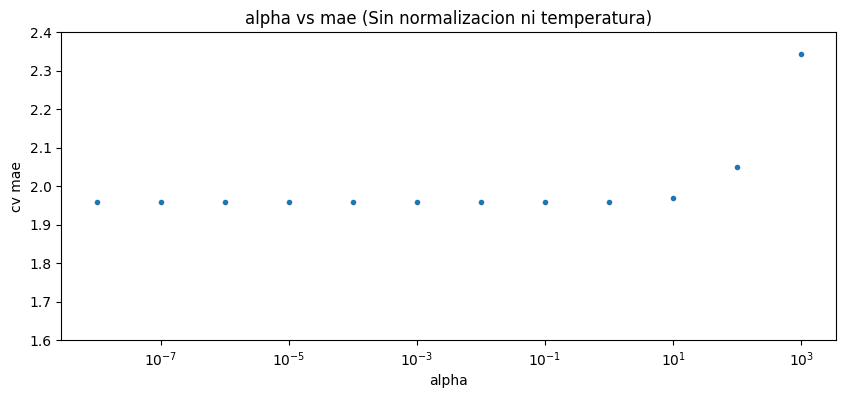

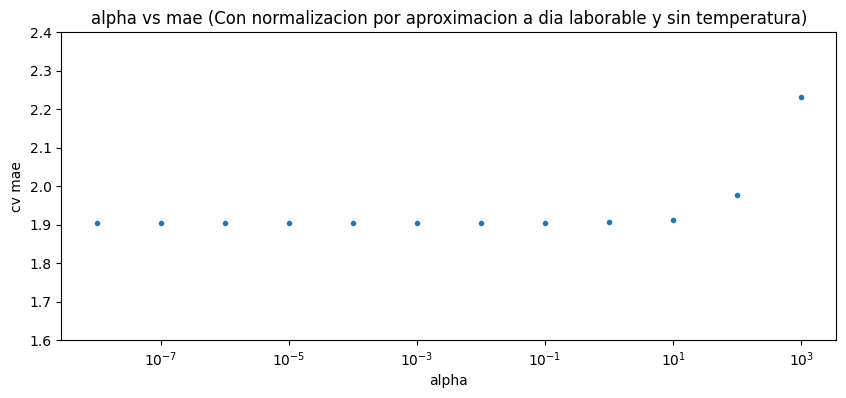

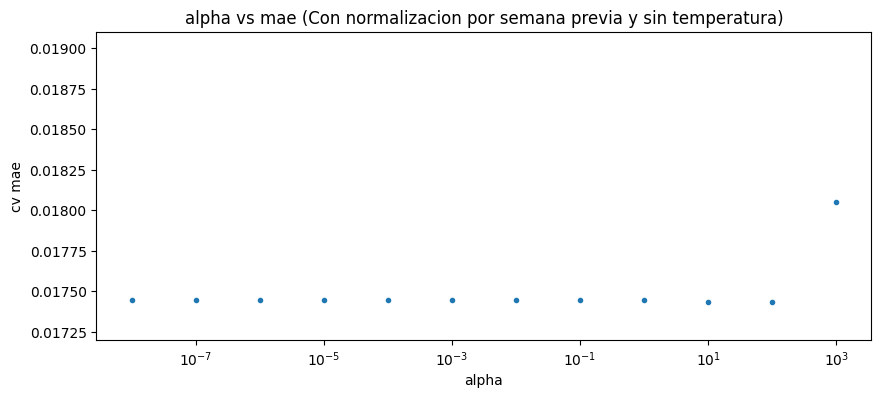

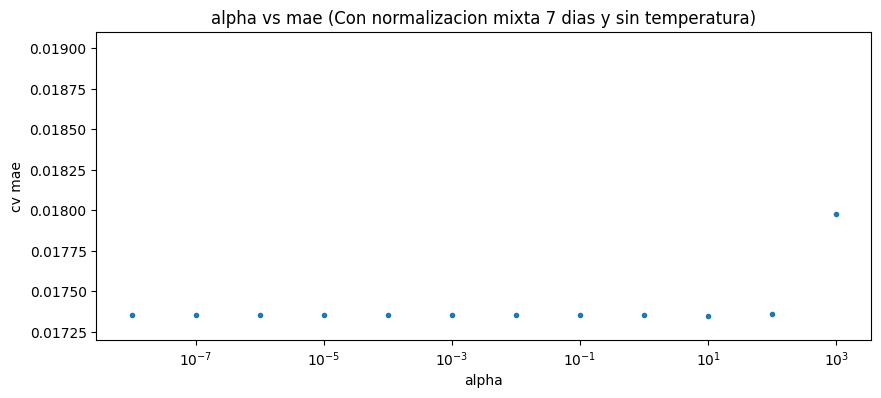

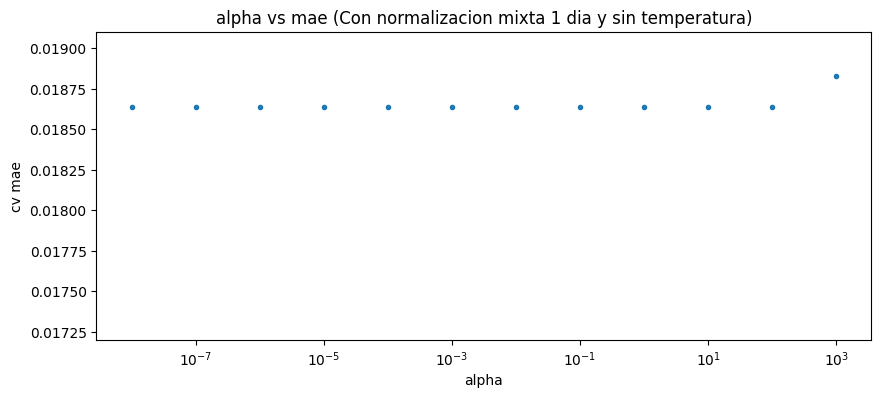

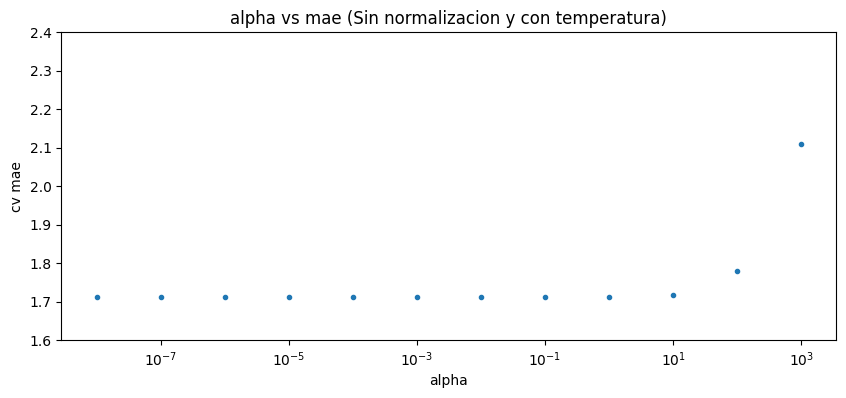

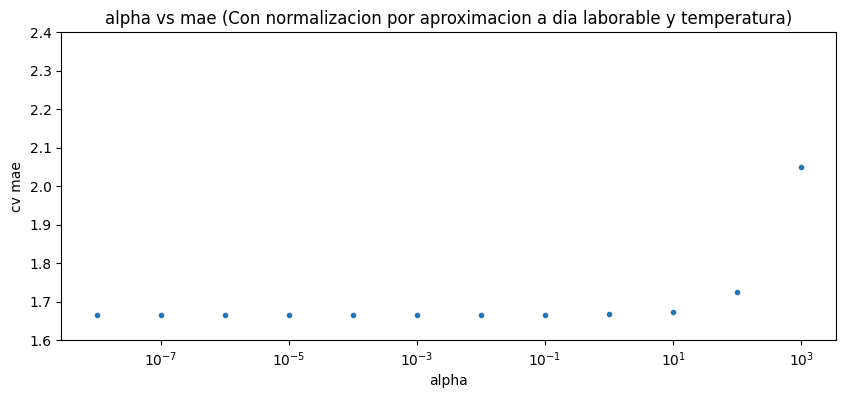

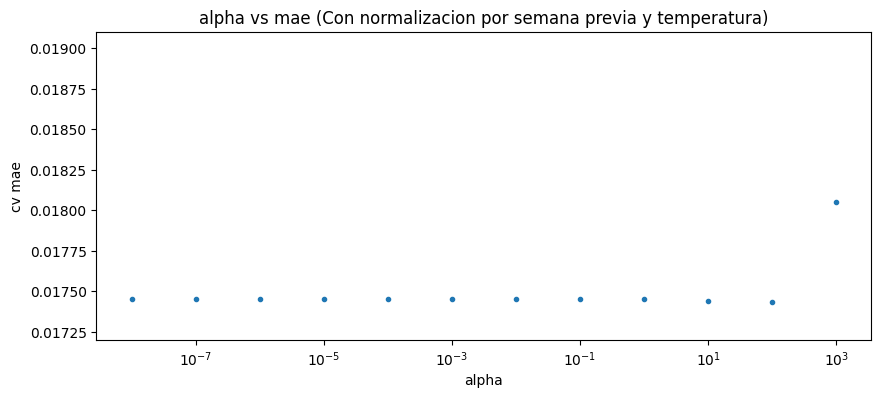

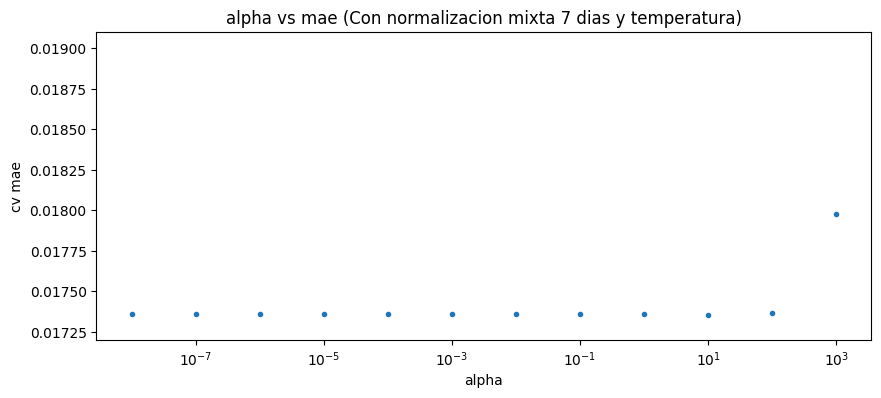

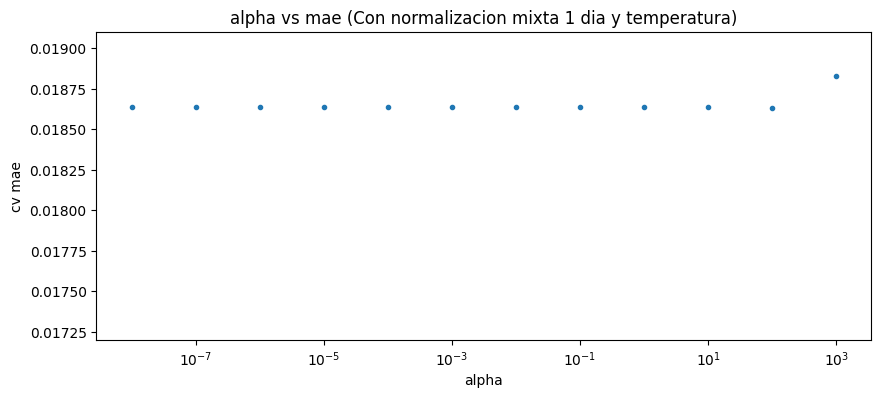

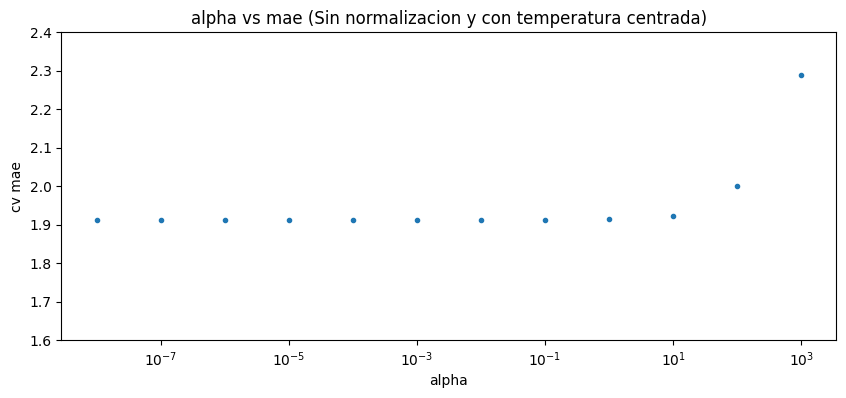

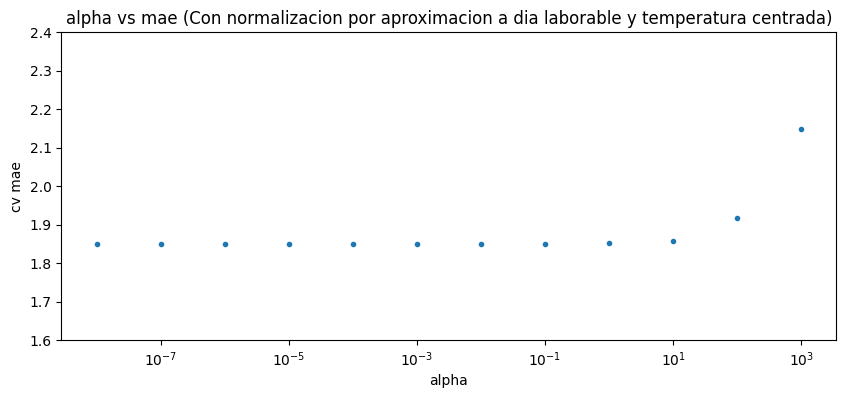

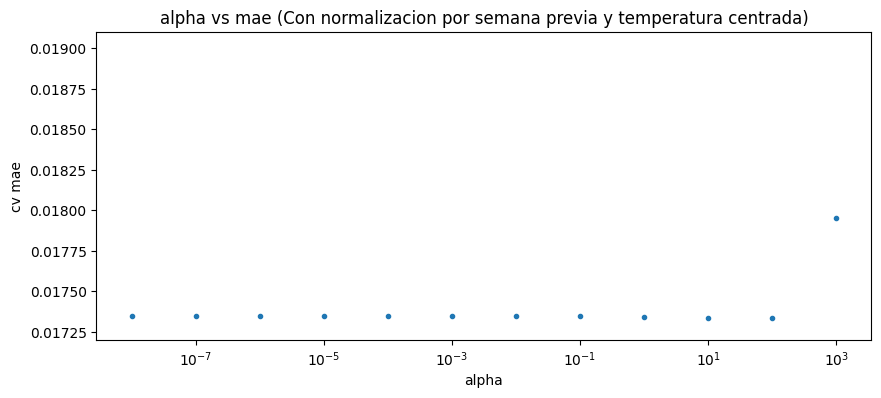

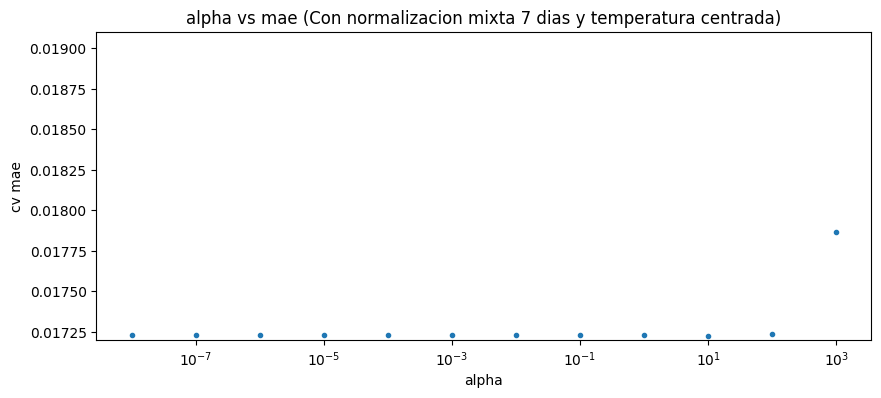

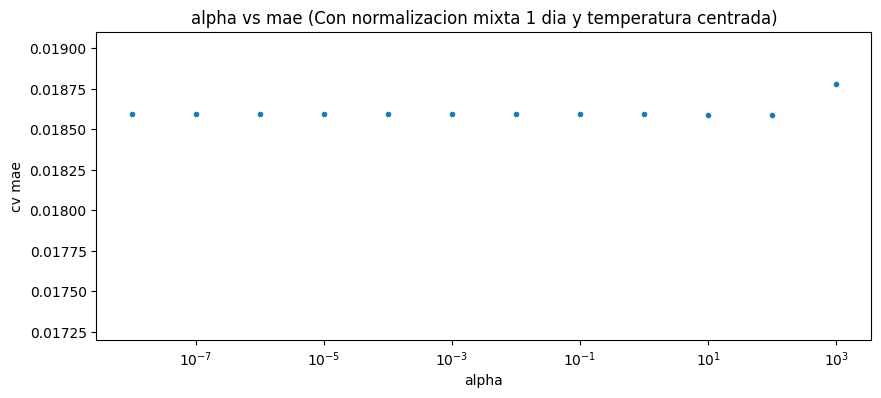

In [1]:
import joblib
from modulo_estimacion import info_mejores_estimadores
import matplotlib.pyplot as plt

l_alpha = [10**k for k in range(-8, 4)]
param_grid = {'regressor__ridge__alpha': l_alpha}

cv_estimator_0Sin = joblib.load("estimadores/ridge/est_0Sin.pkl")
cv_estimator_1Sin = joblib.load("estimadores/ridge/est_1Sin.pkl")
cv_estimator_2Sin = joblib.load("estimadores/ridge/est_2Sin.pkl")
cv_estimator_37Sin = joblib.load("estimadores/ridge/est_37Sin.pkl")
cv_estimator_31Sin = joblib.load("estimadores/ridge/est_31Sin.pkl")
cv_estimator_0Con = joblib.load("estimadores/ridge/est_0Con.pkl")
cv_estimator_1Con = joblib.load("estimadores/ridge/est_1Con.pkl")
cv_estimator_2Con = joblib.load("estimadores/ridge/est_2Con.pkl")
cv_estimator_37Con = joblib.load("estimadores/ridge/est_37Con.pkl")
cv_estimator_31Con = joblib.load("estimadores/ridge/est_31Con.pkl")
cv_estimator_0ConCen = joblib.load("estimadores/ridge/est_0ConCen.pkl")
cv_estimator_1ConCen = joblib.load("estimadores/ridge/est_1ConCen.pkl")
cv_estimator_2ConCen = joblib.load("estimadores/ridge/est_2ConCen.pkl")
cv_estimator_37ConCen = joblib.load("estimadores/ridge/est_37ConCen.pkl")
cv_estimator_31ConCen = joblib.load("estimadores/ridge/est_31ConCen.pkl")

df_ridge_search_0Sin = info_mejores_estimadores(cv_estimator_0Sin, param_grid)
df_ridge_search_1Sin = info_mejores_estimadores(cv_estimator_1Sin, param_grid)
df_ridge_search_2Sin = info_mejores_estimadores(cv_estimator_2Sin, param_grid)
df_ridge_search_37Sin = info_mejores_estimadores(cv_estimator_37Sin, param_grid)
df_ridge_search_31Sin = info_mejores_estimadores(cv_estimator_31Sin, param_grid)
df_ridge_search_0Con = info_mejores_estimadores(cv_estimator_0Con, param_grid)
df_ridge_search_1Con = info_mejores_estimadores(cv_estimator_1Con, param_grid)
df_ridge_search_2Con = info_mejores_estimadores(cv_estimator_2Con, param_grid)
df_ridge_search_37Con = info_mejores_estimadores(cv_estimator_37Con, param_grid)
df_ridge_search_31Con = info_mejores_estimadores(cv_estimator_31Con, param_grid)
df_ridge_search_0ConCen = info_mejores_estimadores(cv_estimator_0ConCen, param_grid)
df_ridge_search_1ConCen = info_mejores_estimadores(cv_estimator_1ConCen, param_grid)
df_ridge_search_2ConCen = info_mejores_estimadores(cv_estimator_2ConCen, param_grid)
df_ridge_search_37ConCen = info_mejores_estimadores(cv_estimator_37ConCen, param_grid)
df_ridge_search_31ConCen = info_mejores_estimadores(cv_estimator_31ConCen, param_grid)

ancho = 10
alto = 4

plt.figure(figsize=(ancho,alto))
plt.title('alpha vs mae (Sin normalizacion ni temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([1.6, 2.4])
plt.plot(df_ridge_search_0Sin['param_regressor__ridge__alpha'], -df_ridge_search_0Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('alpha vs mae (Con normalizacion por aproximacion a dia laborable y sin temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([1.6, 2.4])
plt.plot(df_ridge_search_1Sin['param_regressor__ridge__alpha'], -df_ridge_search_1Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('alpha vs mae (Con normalizacion por semana previa y sin temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.0172, 0.0191])
plt.plot(df_ridge_search_2Sin['param_regressor__ridge__alpha'], -df_ridge_search_2Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('alpha vs mae (Con normalizacion mixta 7 dias y sin temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.0172, 0.0191])
plt.plot(df_ridge_search_37Sin['param_regressor__ridge__alpha'], -df_ridge_search_37Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('alpha vs mae (Con normalizacion mixta 1 dia y sin temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.0172, 0.0191])
plt.plot(df_ridge_search_31Sin['param_regressor__ridge__alpha'], -df_ridge_search_31Sin['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('alpha vs mae (Sin normalizacion y con temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([1.6, 2.4])
plt.plot(df_ridge_search_0Con['param_regressor__ridge__alpha'], -df_ridge_search_0Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('alpha vs mae (Con normalizacion por aproximacion a dia laborable y temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([1.6, 2.4])
plt.plot(df_ridge_search_1Con['param_regressor__ridge__alpha'], -df_ridge_search_1Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('alpha vs mae (Con normalizacion por semana previa y temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.0172, 0.0191])
plt.plot(df_ridge_search_2Con['param_regressor__ridge__alpha'], -df_ridge_search_2Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('alpha vs mae (Con normalizacion mixta 7 dias y temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.0172, 0.0191])
plt.plot(df_ridge_search_37Con['param_regressor__ridge__alpha'], -df_ridge_search_37Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('alpha vs mae (Con normalizacion mixta 1 dia y temperatura)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.0172, 0.0191])
plt.plot(df_ridge_search_31Con['param_regressor__ridge__alpha'], -df_ridge_search_31Con['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('alpha vs mae (Sin normalizacion y con temperatura centrada)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([1.6, 2.4])
plt.plot(df_ridge_search_0ConCen['param_regressor__ridge__alpha'], -df_ridge_search_0ConCen['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('alpha vs mae (Con normalizacion por aproximacion a dia laborable y temperatura centrada)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([1.6, 2.4])
plt.plot(df_ridge_search_1ConCen['param_regressor__ridge__alpha'], -df_ridge_search_1ConCen['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('alpha vs mae (Con normalizacion por semana previa y temperatura centrada)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.0172, 0.0191])
plt.plot(df_ridge_search_2ConCen['param_regressor__ridge__alpha'], -df_ridge_search_2ConCen['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('alpha vs mae (Con normalizacion mixta 7 dias y temperatura centrada)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.0172, 0.0191])
plt.plot(df_ridge_search_37ConCen['param_regressor__ridge__alpha'], -df_ridge_search_37ConCen['mean_test_score'], '.')
plt.show()

plt.figure(figsize=(ancho,alto))
plt.title('alpha vs mae (Con normalizacion mixta 1 dia y temperatura centrada)')
plt.xlabel('alpha')
plt.ylabel('cv mae')
plt.xscale('log')
plt.ylim([0.0172, 0.0191])
plt.plot(df_ridge_search_31ConCen['param_regressor__ridge__alpha'], -df_ridge_search_31ConCen['mean_test_score'], '.')
plt.show()

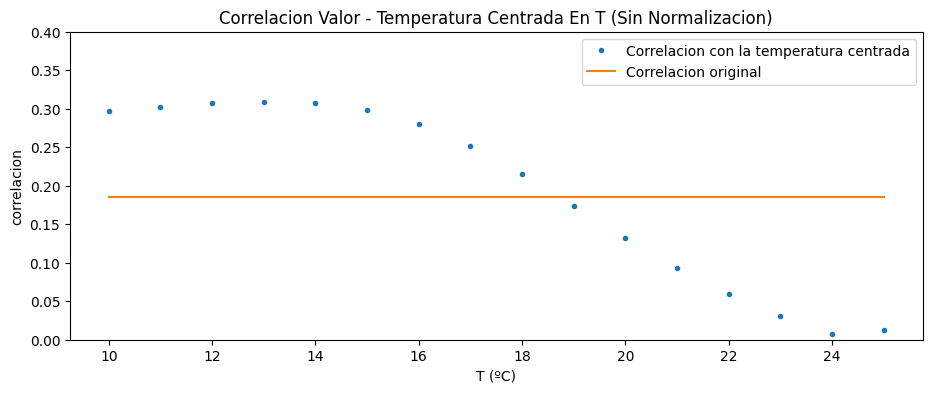

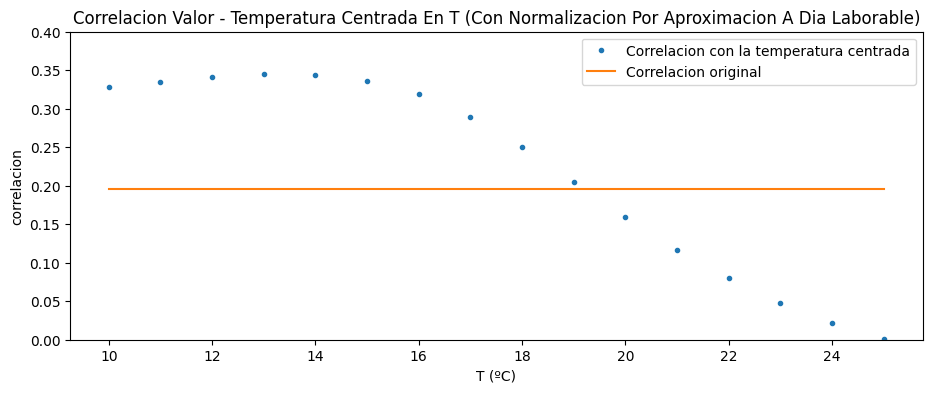

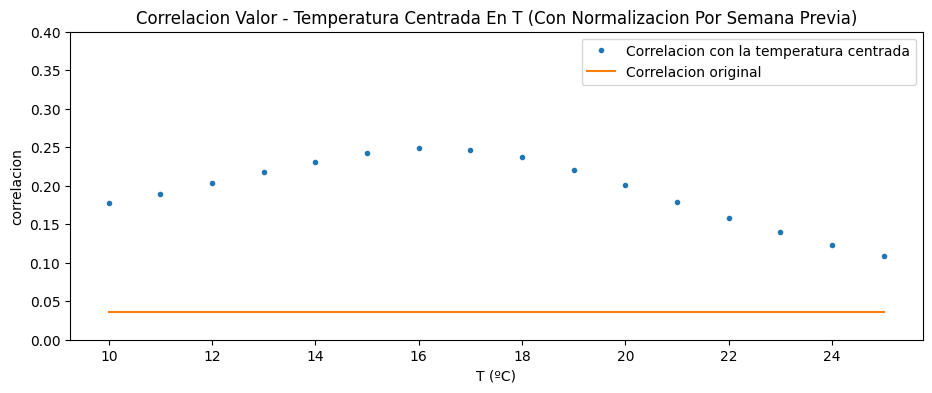

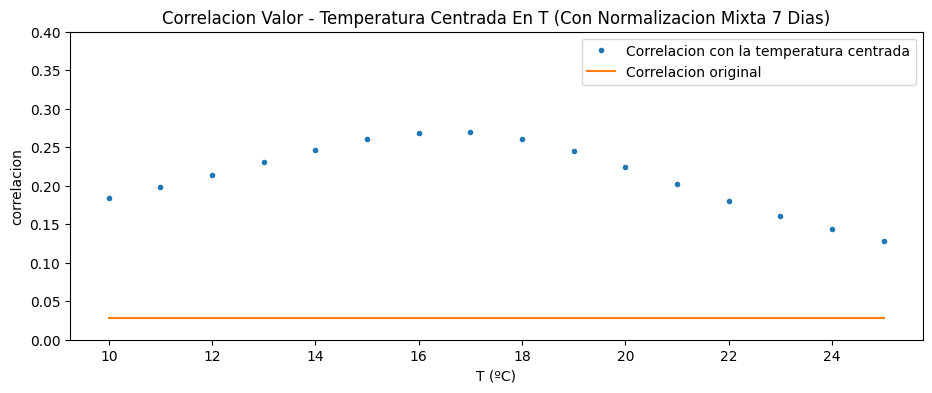

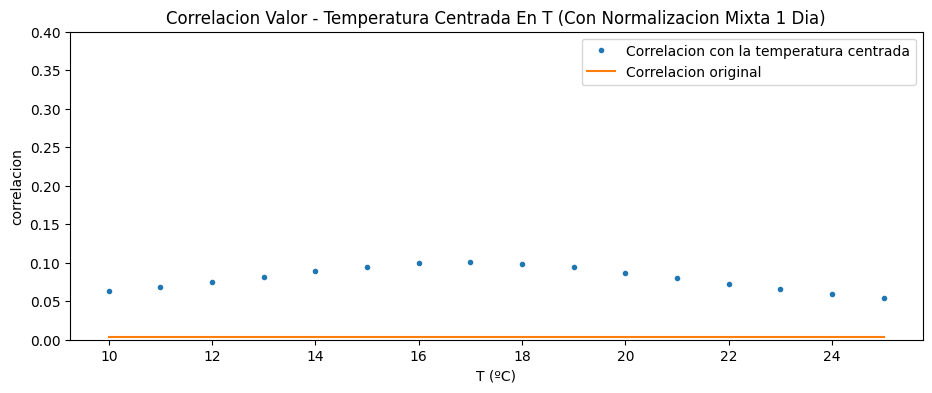

In [1]:
from modulo_datos import estudio_temperatura
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dtype={'Indice': np.int64,
       'Valor': np.float64,
       'Prevision': np.float64,
       'Dia': str,
       'Dia_Semana': str,
       'Hora': str,
       'Temperatura': np.float64,
       'Fecha': str,
       'Valor_Normalizado1': np.float64,
       'Valor_Normalizado2': np.float64,
       'Valor_Normalizado3_7d': np.float64,
       'Valor_Normalizado3_1d': np.float64,
       'Temperatura_Centrada0': np.float64,
       'Temperatura_Centrada1': np.float64,
       'Temperatura_Centrada2': np.float64,
       'Temperatura_Centrada3_7d': np.float64,
       'Temperatura_Centrada3_1d': np.float64}

data = pd.read_csv('data.csv', sep=';', index_col=0, dtype=dtype, parse_dates=['Fecha'])

l_t = [10.0+k for k in range(16)]

l_corr0, cor0 = estudio_temperatura(data['Temperatura'], data['Valor'], l_t, pot=2)
l_corr1, cor1 = estudio_temperatura(data['Temperatura'], data['Valor_Normalizado1'], l_t, pot=2)
l_corr2, cor2 = estudio_temperatura(data['Temperatura'], data['Valor_Normalizado2'], l_t, pot=2)
l_corr37, cor37 = estudio_temperatura(data['Temperatura'], data['Valor_Normalizado3_7d'], l_t, pot=2)
l_corr31, cor31 = estudio_temperatura(data['Temperatura'], data['Valor_Normalizado3_1d'], l_t, pot=2)

ancho = 11
alto = 4

plt.figure(figsize=(ancho,alto))
plt.plot(l_t, l_corr0, '.', label="Correlacion con la temperatura centrada")
plt.plot(l_t, [cor0 for _ in l_t], label="Correlacion original")
plt.title('Correlacion Valor - Temperatura Centrada En T (Sin Normalizacion)')
plt.xlabel('T (ºC)')
plt.ylabel('correlacion')
plt.ylim([0.0, 0.4])
plt.legend()
plt.show()

plt.figure(figsize=(ancho,alto))
plt.plot(l_t, l_corr1, '.', label="Correlacion con la temperatura centrada")
plt.plot(l_t, [cor1 for _ in l_t], label="Correlacion original")
plt.title('Correlacion Valor - Temperatura Centrada En T (Con Normalizacion Por Aproximacion A Dia Laborable)')
plt.xlabel('T (ºC)')
plt.ylabel('correlacion')
plt.ylim([0.0, 0.4])
plt.legend()
plt.show()

plt.figure(figsize=(ancho,alto))
plt.plot(l_t, l_corr2, '.', label="Correlacion con la temperatura centrada")
plt.plot(l_t, [cor2 for _ in l_t], label="Correlacion original")
plt.title('Correlacion Valor - Temperatura Centrada En T (Con Normalizacion Por Semana Previa)')
plt.xlabel('T (ºC)')
plt.ylabel('correlacion')
plt.ylim([0.0, 0.4])
plt.legend()
plt.show()

plt.figure(figsize=(ancho,alto))
plt.plot(l_t, l_corr37, '.', label="Correlacion con la temperatura centrada")
plt.plot(l_t, [cor37 for _ in l_t], label="Correlacion original")
plt.title('Correlacion Valor - Temperatura Centrada En T (Con Normalizacion Mixta 7 Dias)')
plt.xlabel('T (ºC)')
plt.ylabel('correlacion')
plt.ylim([0.0, 0.4])
plt.legend()
plt.show()

plt.figure(figsize=(ancho,alto))
plt.plot(l_t, l_corr31, '.', label="Correlacion con la temperatura centrada")
plt.plot(l_t, [cor31 for _ in l_t], label="Correlacion original")
plt.title('Correlacion Valor - Temperatura Centrada En T (Con Normalizacion Mixta 1 Dia)')
plt.xlabel('T (ºC)')
plt.ylabel('correlacion')
plt.ylim([0.0, 0.4])
plt.legend()
plt.show()

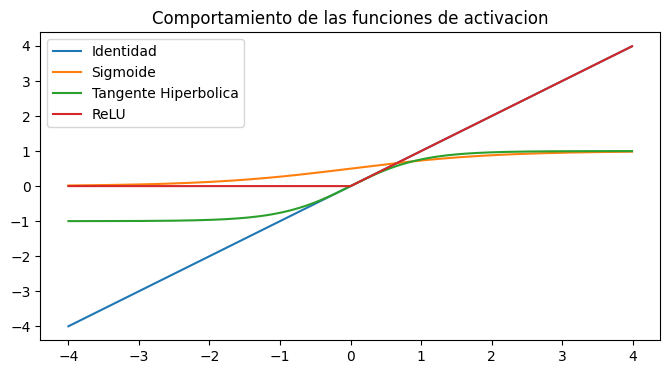

In [11]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.arange(-4,4,0.01)
iden = [x for x in xs]
sigm = [1/(1+np.e**(-x)) for x in xs]
tanh = [np.tanh(x) for x in xs]
relu = [max(0,x) for x in xs]

ancho = 8
alto = 4

plt.figure(figsize=(ancho,alto))
plt.plot(xs, iden, label="Identidad")
plt.plot(xs, sigm, label="Sigmoide")
plt.plot(xs, tanh, label="Tangente Hiperbolica")
plt.plot(xs, relu, label="ReLU")
plt.title('Comportamiento de las funciones de activacion')
plt.legend()
plt.show()

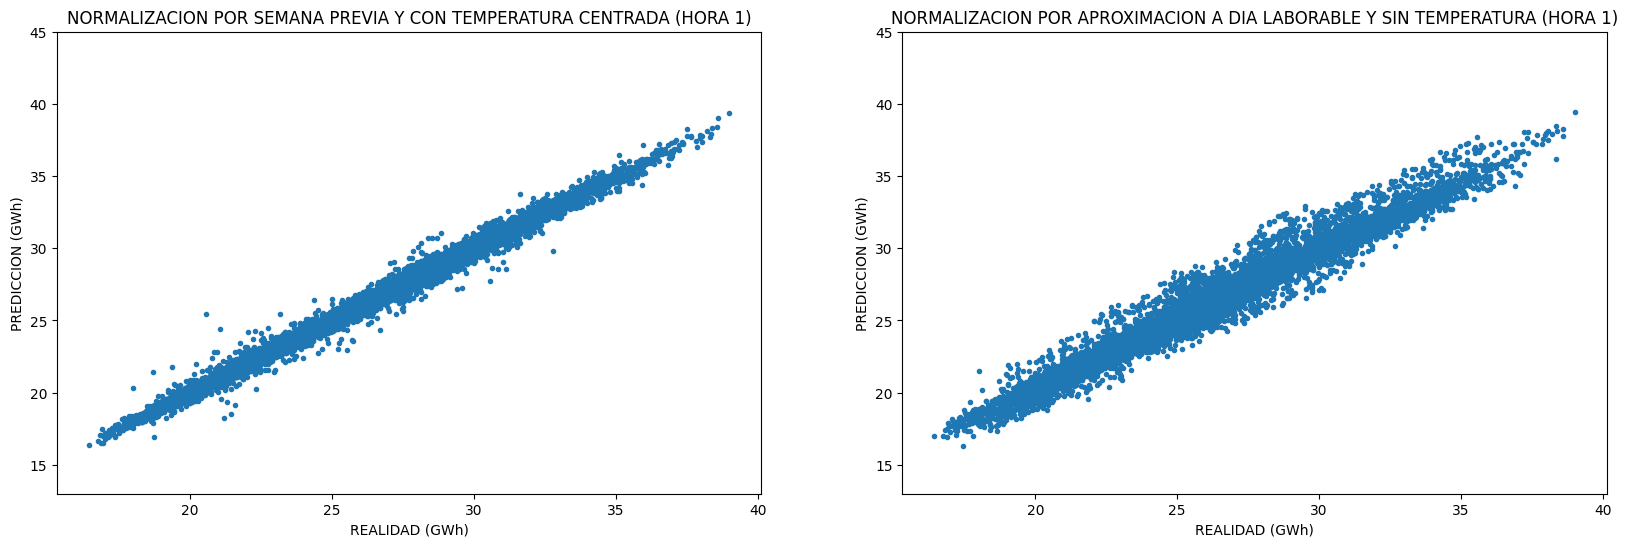

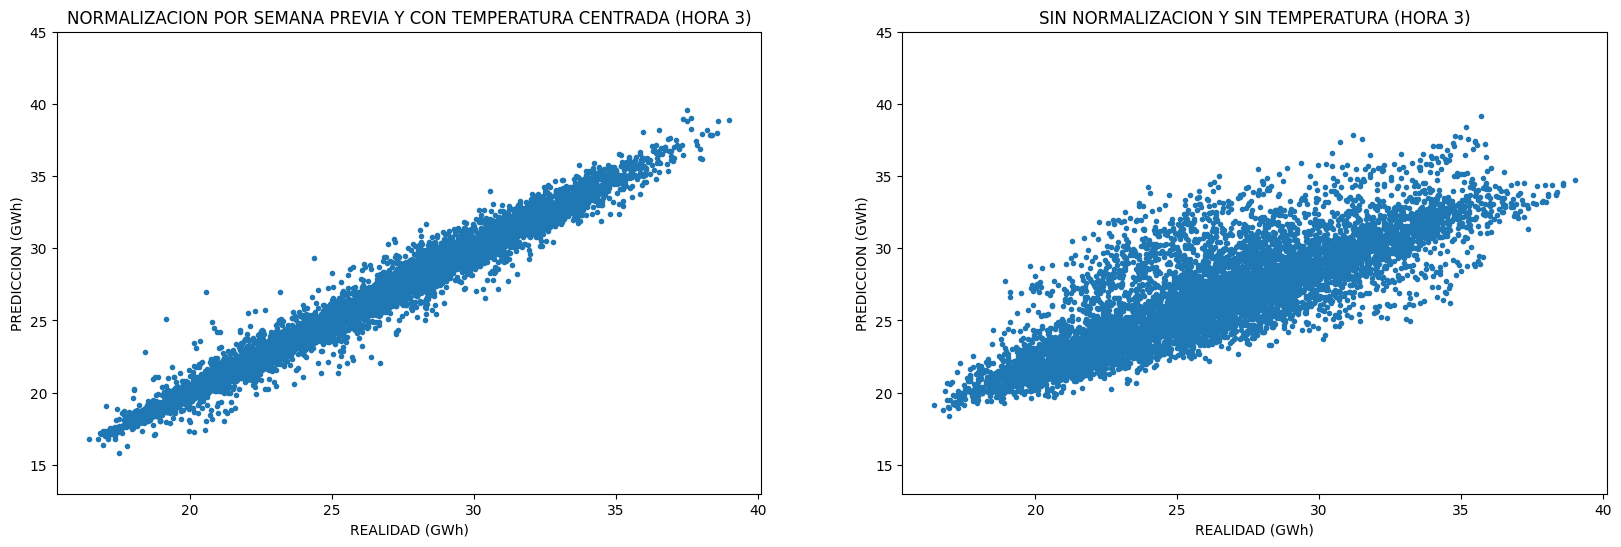

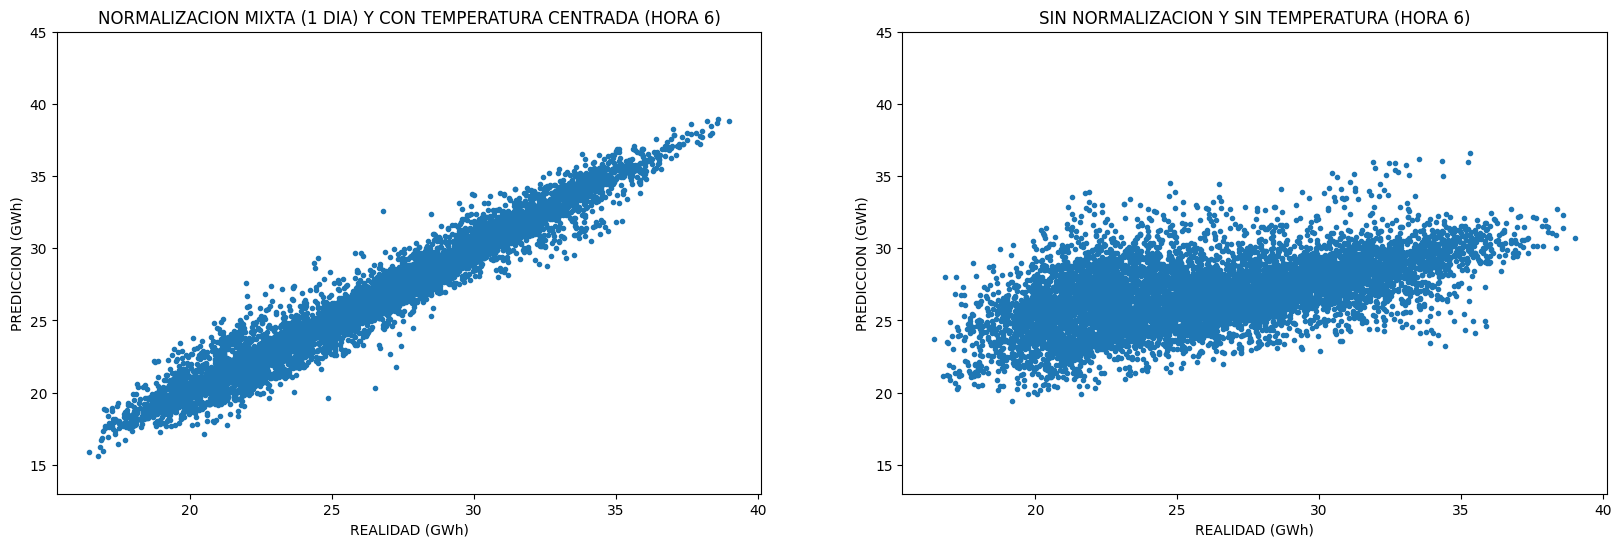

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

preds = pd.read_csv('preds.csv', sep=';', index_col=0)

ancho = 20
alto = 6

plt.figure(figsize=(ancho,alto))

plt.subplot(1, 2, 1)
plt.plot(preds["yTest_0"], preds["RR2ConCen_0"], ".")
plt.title("NORMALIZACION POR SEMANA PREVIA Y CON TEMPERATURA CENTRADA (HORA 1)")
plt.xlabel("REALIDAD (GWh)")
plt.ylabel("PREDICCION (GWh)")
plt.ylim([13, 45])

plt.subplot(1, 2, 2)
plt.plot(preds["yTest_0"], preds["RR1Sin_0"], ".")
plt.title("NORMALIZACION POR APROXIMACION A DIA LABORABLE Y SIN TEMPERATURA (HORA 1)")
plt.xlabel("REALIDAD (GWh)")
plt.ylabel("PREDICCION (GWh)")
plt.ylim([13, 45])

plt.show()

plt.figure(figsize=(ancho,alto))

plt.subplot(1, 2, 1)
plt.plot(preds["yTest_2"], preds["RR2ConCen_2"], ".")
plt.title("NORMALIZACION POR SEMANA PREVIA Y CON TEMPERATURA CENTRADA (HORA 3)")
plt.xlabel("REALIDAD (GWh)")
plt.ylabel("PREDICCION (GWh)")
plt.ylim([13, 45])

plt.subplot(1, 2, 2)
plt.plot(preds["yTest_2"], preds["RR0Sin_2"], ".")
plt.title("SIN NORMALIZACION Y SIN TEMPERATURA (HORA 3)")
plt.xlabel("REALIDAD (GWh)")
plt.ylabel("PREDICCION (GWh)")
plt.ylim([13, 45])

plt.show()

plt.figure(figsize=(ancho,alto))

plt.subplot(1, 2, 1)
plt.plot(preds["yTest_5"], preds["RR31ConCen_5"], ".")
plt.title("NORMALIZACION MIXTA (1 DIA) Y CON TEMPERATURA CENTRADA (HORA 6)")
plt.xlabel("REALIDAD (GWh)")
plt.ylabel("PREDICCION (GWh)")
plt.ylim([13, 45])

plt.subplot(1, 2, 2)
plt.plot(preds["yTest_5"], preds["RR0Sin_5"], ".")
plt.title("SIN NORMALIZACION Y SIN TEMPERATURA (HORA 6)")
plt.xlabel("REALIDAD (GWh)")
plt.ylabel("PREDICCION (GWh)")
plt.ylim([13, 45])

plt.show()